<a href="https://colab.research.google.com/github/joony0512/Linear_Programming/blob/main/LinearProgramming_%EC%A3%BC%EC%8B%9D%ED%8F%AC%ED%8A%B8%ED%8F%B4%EB%A6%AC%EC%98%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pulp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


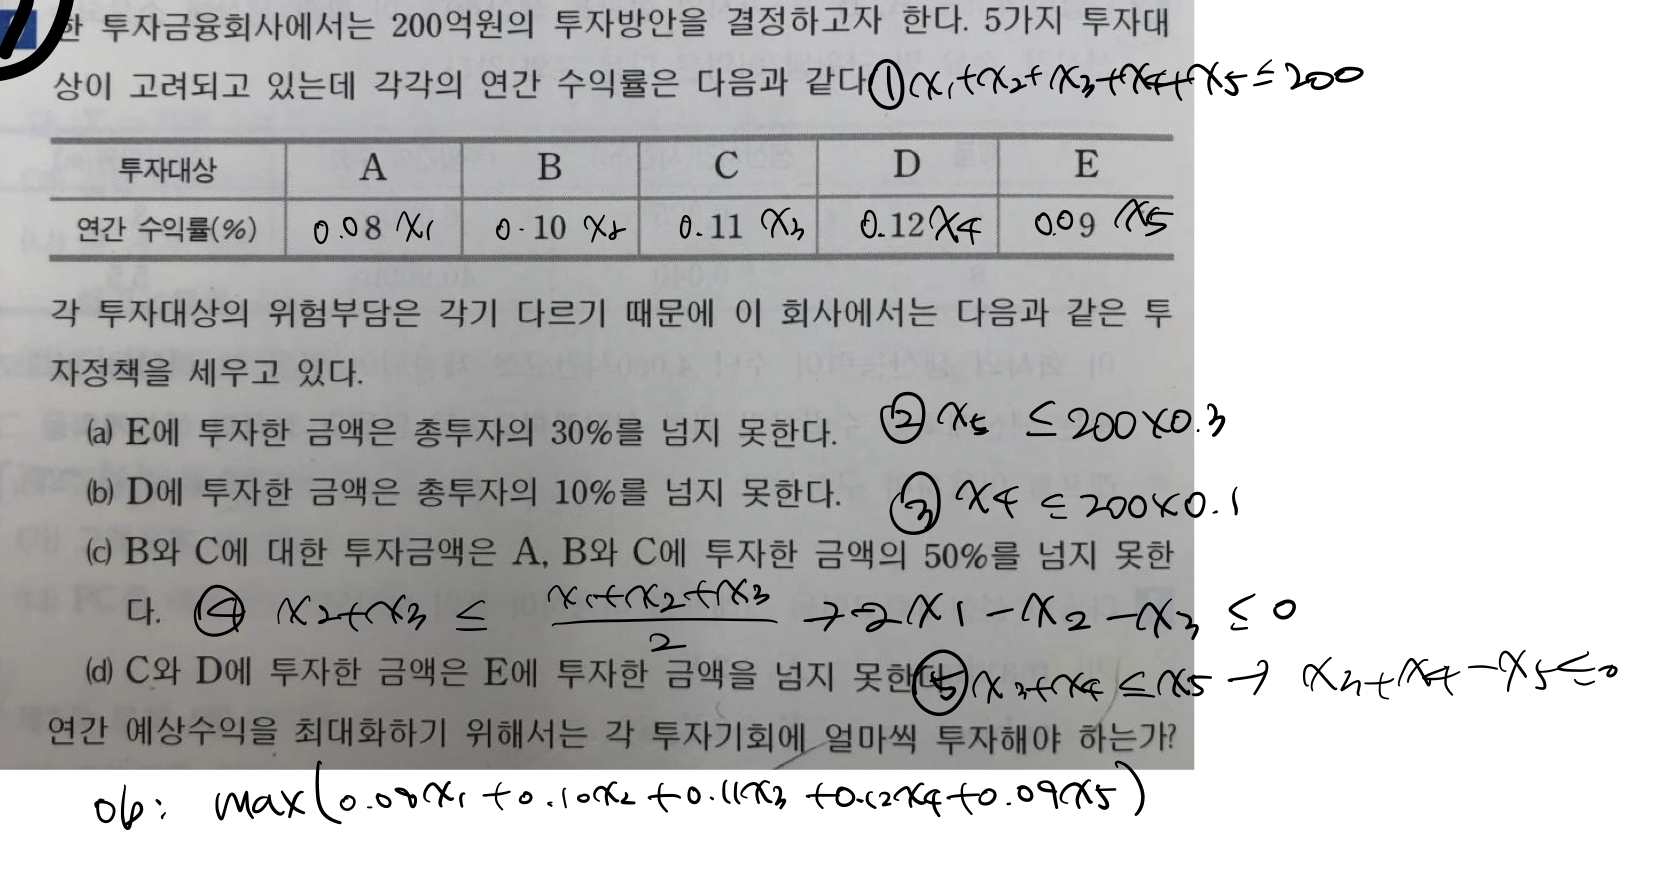

In [ ]:
from pulp import *
model = LpProblem(name ='foltpolio', sense =LpMaximize)

In [ ]:
num_variables =5
variables = [LpVariable(name=f'x{i}', lowBound =0) for i in range(1, num_variables+1)]

constraints =[]
constr_coeff =[[1,1,1,1,1],[0,0,0,0,1], [0,0,0,1,0],[-2,-1,-1,0,0],[0,0,1,1,-1]]
constraints_num =5

j_list = [[0,1,2,3,4],[4],[3],[0,1,2],[2,3,4]]
for i in range(constraints_num):
  rhs_values =[200, 200*0.3, 200*0.1, 0, 0 ]
  constr_sup =LpConstraint(
      e = LpAffineExpression([(variables[j], constr_coeff[i][j]) for j in j_list[i] ]),
      sense =LpConstraintLE,
      rhs =rhs_values[i],
      name =f'constraint_sup{i+1}'
  )
  constraints.append(constr_sup)


In [ ]:
print(constraints)

[1*x1 + 1*x2 + 1*x3 + 1*x4 + 1*x5 + -200 <= 0, 1*x5 + -60.0 <= 0, 1*x4 + -20.0 <= 0, -2*x1 + -1*x2 + -1*x3 + 0 <= 0, 1*x3 + 1*x4 + -1*x5 + 0 <= 0]


In [ ]:
obj_coeff =[1,1,1,1,1]
obj =LpAffineExpression([(variables[i], obj_coeff[i]) for i in range(num_variables)])
model += obj

In [ ]:
for constraint in constraints:
  model += constraint

print(model)
model.writeLP('out.txt')

foltpolio:
MAXIMIZE
1*x1 + 1*x2 + 1*x3 + 1*x4 + 1*x5 + 0
SUBJECT TO
constraint_sup1: x1 + x2 + x3 + x4 + x5 <= 200

constraint_sup2: x5 <= 60

constraint_sup3: x4 <= 20

constraint_sup4: - 2 x1 - x2 - x3 <= 0

constraint_sup5: x3 + x4 - x5 <= 0

VARIABLES
x1 Continuous
x2 Continuous
x3 Continuous
x4 Continuous
x5 Continuous



[x1, x2, x3, x4, x5]

In [ ]:
model.solve()

for variable in variables:
  print(f'{variable.name} : {variable.value()}')

print(f'Optimal object value: {model.objective.value()}')

x1 : 80.0
x2 : 0.0
x3 : 60.0
x4 : 0.0
x5 : 60.0
Optimal object value: 200.0
